<a class="anchor" id="lab-task-1"></a>
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong style="color:#FF5555">1. Lab Task: </strong> 
    <ol>       
        <li>Complete the <strong>Kafka Consumer</strong> in the file <code>LT1-Consumer.ipynb</code>. Here you are required address the following requirements:
       <ul>
           <li>Read the incoming data stream in the topic <strong>clickstream</strong></li>
           <li>Generate a real-time visualization showing <strong>total number of clicks and impressions for every instance received</strong></li>
            </ul>
    </ol>
</div>



<IPython.core.display.Javascript object>


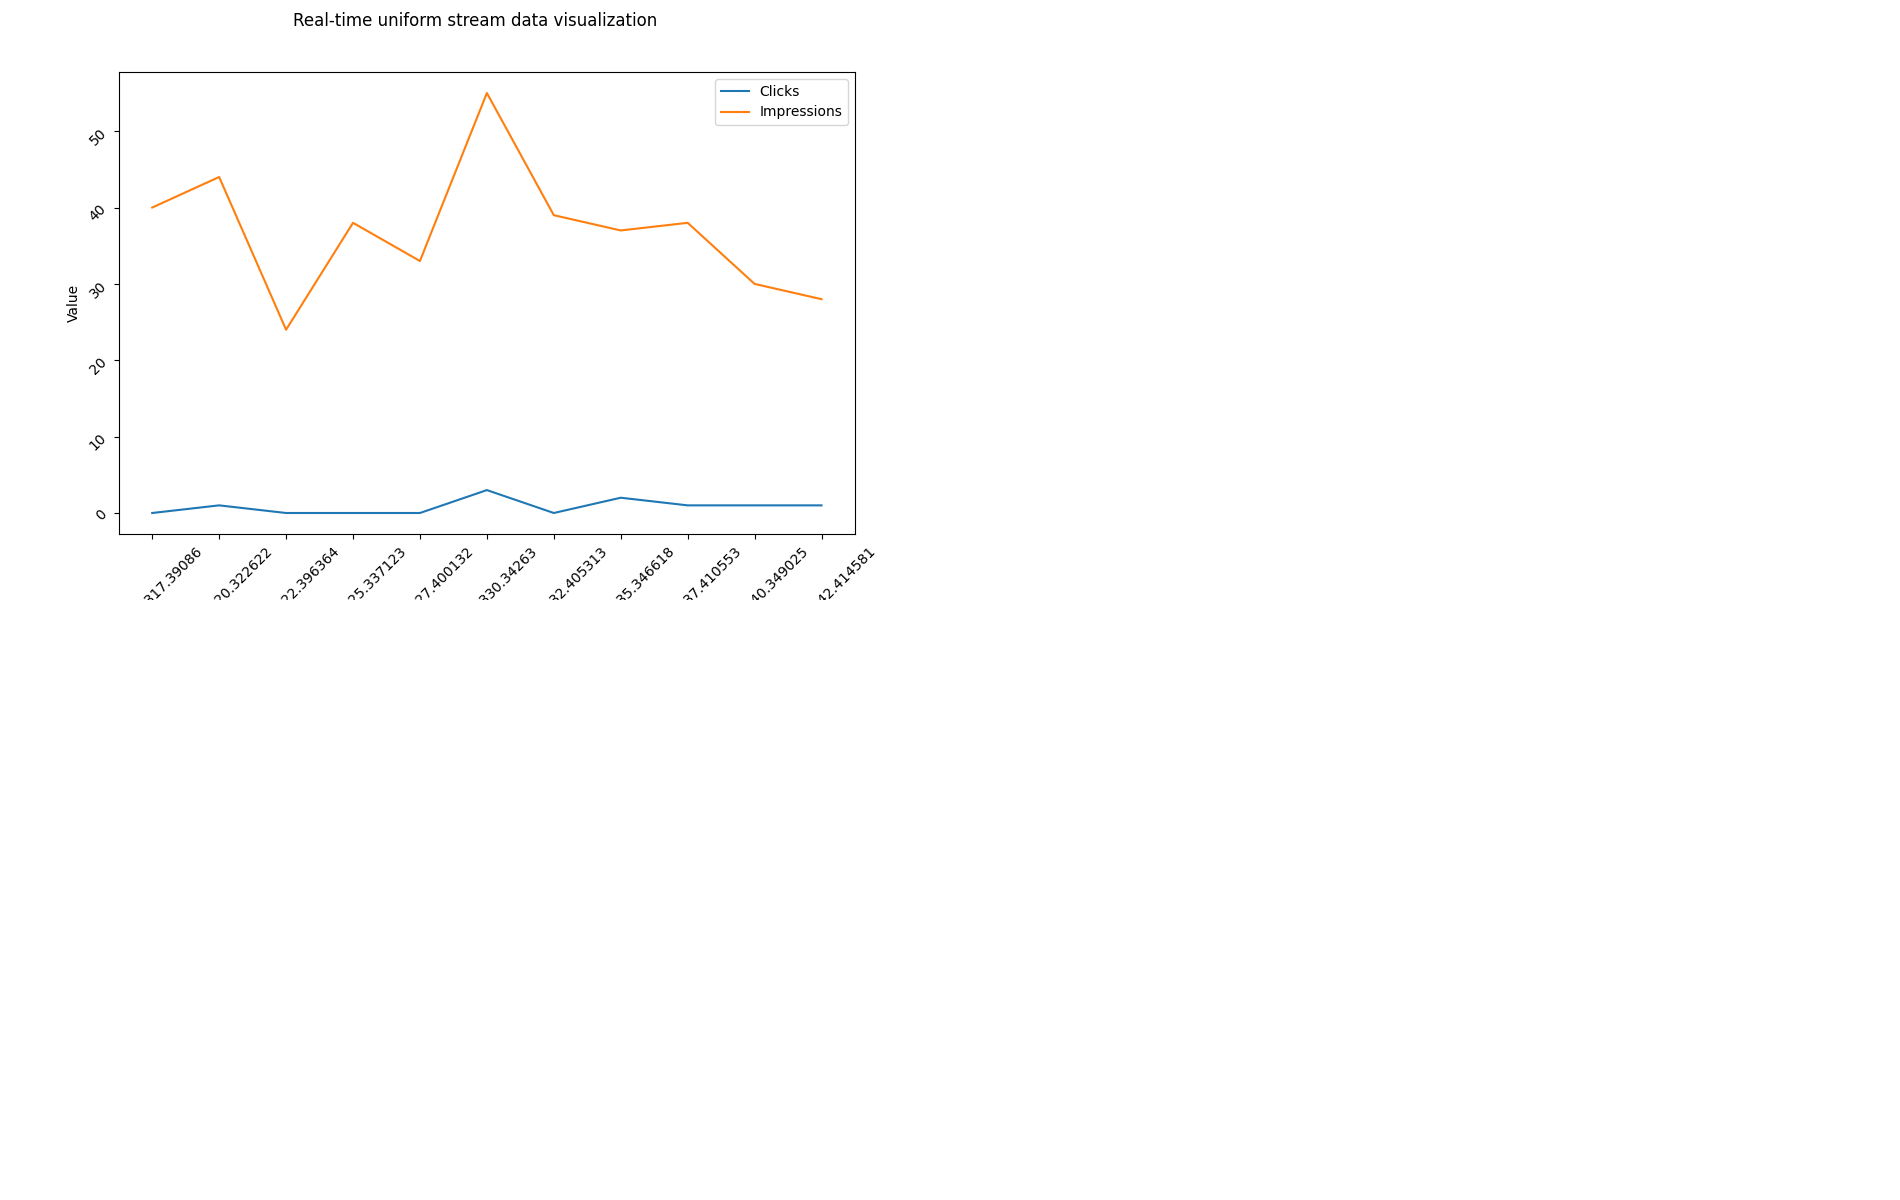

In [ ]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'clickstream'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []  
        for message in consumer:   
            #WRITE THE CODE BELOW
            #access the "clicks" and "impressions" sent from the producer
            #access the "timestamp"
            #get the total clicks for the number of rows 
            #get the total impressions for the number of rows
            #append to X and Y respectively
            #visualize and update the graph
#           val = load(message.value)
            rows = message.value['data']
            time = str(message.value['ts'])
            clicks = 0
            impressions = 0
            for row in rows:
                clicks += int(row['Clicks'])
                impressions += int(row['Impressions'])
            x.append(time)
            y.append((clicks, impressions))
            if len(y)>10:
                ax.clear()
                lines = ax.plot(x,y)
                ax.tick_params(labelrotation = 45)
                ax.set_xlabel('Time')
                ax.set_ylabel('Value')
                ax.legend(lines[:2], ["Clicks", "Impressions"], loc = 'upper right')
#                 ax_set_ylim(0,110)
#                 ax.set_yticks([0,20,40,60,80,100])
                fig.canvas.draw()
                x.pop(0)
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)        
    

In [ ]:
consumer = connect_kafka_consumer()
fig, ax = init_plots()  
consume_messages(consumer, fig, ax)  

In [ ]:
!pip uninstall matplotlib --yes

In [ ]:
!pip install matplotlib